In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | cockburn town
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | tula
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | valpoi
Processing Record 10 of Set 1 | maniitsoq
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | montrose
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | batagay-alyta
Processing Record 16 of Set 1 | raga
Processing Record 17 of Set 1 | xichang
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | mizdah
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 of Set 1 | 

Processing Record 38 of Set 4 | sur
Processing Record 39 of Set 4 | naze
Processing Record 40 of Set 4 | bonavista
Processing Record 41 of Set 4 | avarua
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | kieta
Processing Record 44 of Set 4 | teahupoo
Processing Record 45 of Set 4 | launceston
Processing Record 46 of Set 4 | husavik
Processing Record 47 of Set 4 | poum
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | codrington
Processing Record 50 of Set 4 | machico
Processing Record 1 of Set 5 | mount isa
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | marienburg
Processing Record 5 of Set 5 | kamenka
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of Set 5 | verkhoyansk
Processing Record 8 of Set 5 | ouesso
Processing Record 9 of Set 5 | upernavik
Processing Record 10 of Set 5 | north bend
Processing Record 11 of Set 5 | strelca
City not found. Skipping...
Pr

Processing Record 28 of Set 8 | avera
Processing Record 29 of Set 8 | cangucu
Processing Record 30 of Set 8 | panjakent
Processing Record 31 of Set 8 | asau
Processing Record 32 of Set 8 | sao francisco do sul
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | kuching
Processing Record 35 of Set 8 | novobirilyussy
Processing Record 36 of Set 8 | yaan
Processing Record 37 of Set 8 | bose
Processing Record 38 of Set 8 | zhangjiakou
Processing Record 39 of Set 8 | zhezkazgan
Processing Record 40 of Set 8 | banda aceh
Processing Record 41 of Set 8 | hinesburg
Processing Record 42 of Set 8 | alghero
Processing Record 43 of Set 8 | deputatskiy
Processing Record 44 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 45 of Set 8 | muncar
Processing Record 46 of Set 8 | jasper
Processing Record 47 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 48 of Set 8 | auki
Processing Record 49 of Set 8 | portland
Processing Record 50 of Set 8 | ru

Processing Record 17 of Set 12 | ternate
Processing Record 18 of Set 12 | qingan
City not found. Skipping...
Processing Record 19 of Set 12 | seddon
Processing Record 20 of Set 12 | severodvinsk
Processing Record 21 of Set 12 | karratha
Processing Record 22 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 23 of Set 12 | biarritz
Processing Record 24 of Set 12 | ouadda
Processing Record 25 of Set 12 | broken hill
Processing Record 26 of Set 12 | yarmouth
Processing Record 27 of Set 12 | iracoubo
Processing Record 28 of Set 12 | high level
Processing Record 29 of Set 12 | kargil
Processing Record 30 of Set 12 | santa maria
Processing Record 31 of Set 12 | camacha
Processing Record 32 of Set 12 | ruyigi
Processing Record 33 of Set 12 | oussouye
Processing Record 34 of Set 12 | paoua
Processing Record 35 of Set 12 | guarapari
Processing Record 36 of Set 12 | yazd
Processing Record 37 of Set 12 | ust-maya
Processing Record 38 of Set 12 | sinkat
City not found. Skipping...
P

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,52.38,94,100,11.43,NZ,2021-11-25 20:39:59
1,Cockburn Town,21.4612,-71.1419,78.76,61,40,13.80,TC,2021-11-25 20:40:00
2,Esperance,-33.8667,121.9000,55.24,84,99,8.95,AU,2021-11-25 20:40:00
3,Kapaa,22.0752,-159.3190,80.92,70,40,3.00,US,2021-11-25 20:40:00
4,Tula,54.2044,37.6111,34.09,83,100,14.29,RU,2021-11-25 20:40:01
5,Mahebourg,-20.4081,57.7000,73.69,88,20,5.75,MU,2021-11-25 20:40:01
6,Hithadhoo,-0.6000,73.0833,81.32,71,98,16.26,MV,2021-11-25 20:40:02
7,Barrow,71.2906,-156.7887,-9.38,70,20,12.66,US,2021-11-25 20:40:02
8,Valpoi,15.5305,74.1356,78.37,78,38,4.34,IN,2021-11-25 20:40:02
9,Maniitsoq,65.4167,-52.9000,24.40,71,100,12.12,GL,2021-11-25 20:40:03


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-11-25 20:39:59,-46.6000,168.3333,52.38,94,100,11.43
1,Cockburn Town,TC,2021-11-25 20:40:00,21.4612,-71.1419,78.76,61,40,13.80
2,Esperance,AU,2021-11-25 20:40:00,-33.8667,121.9000,55.24,84,99,8.95
3,Kapaa,US,2021-11-25 20:40:00,22.0752,-159.3190,80.92,70,40,3.00
4,Tula,RU,2021-11-25 20:40:01,54.2044,37.6111,34.09,83,100,14.29


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import time module
import time

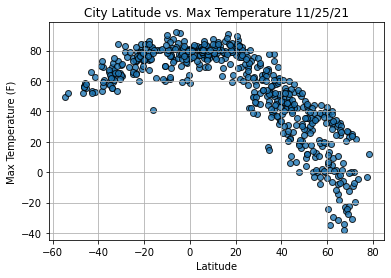

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/ Fig1.png")

# Show plot.
plt.show()

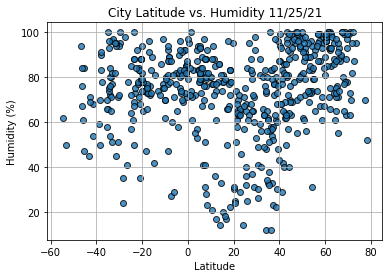

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

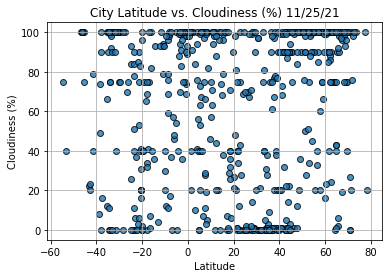

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

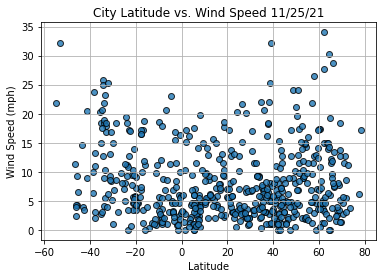

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cockburn Town,TC,2021-11-25 20:40:00,21.4612,-71.1419,78.76,61,40,13.80
3,Kapaa,US,2021-11-25 20:40:00,22.0752,-159.3190,80.92,70,40,3.00
4,Tula,RU,2021-11-25 20:40:01,54.2044,37.6111,34.09,83,100,14.29
7,Barrow,US,2021-11-25 20:40:02,71.2906,-156.7887,-9.38,70,20,12.66
8,Valpoi,IN,2021-11-25 20:40:02,15.5305,74.1356,78.37,78,38,4.34


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

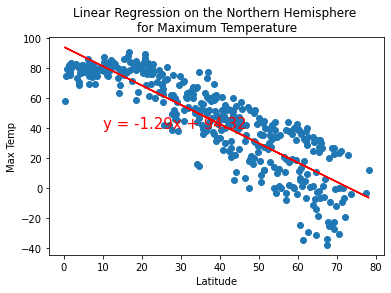

In [21]:
# Linear regression on the Northern Hemisphere MAX TEMP
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(10,40))

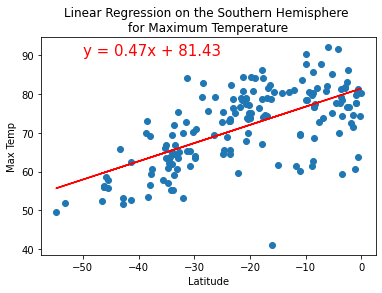

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))

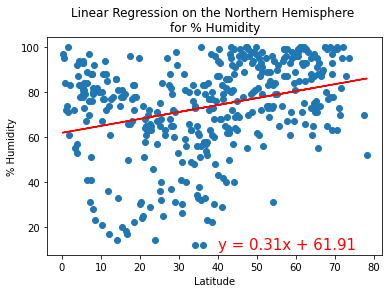

In [23]:
# Linear regression on the Northern Hemisphere HUMIDITY
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

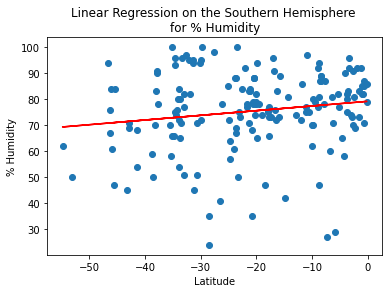

In [24]:
# Linear regression on the Southern Hemisphere HUMIDITY
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))

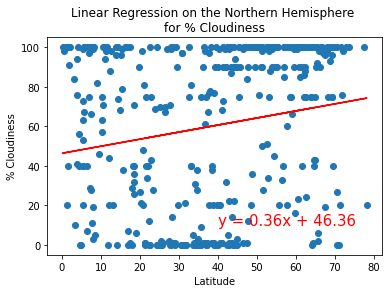

In [25]:
# Linear regression on the Northern Hemisphere CLOUDINESS
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(40,10))

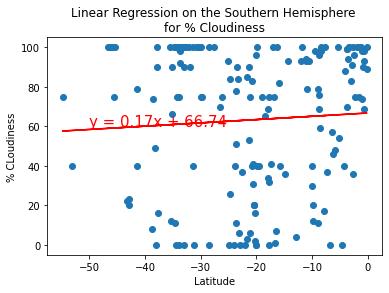

In [26]:
# Linear regression on the Southern Hemisphere CLOUDINESS
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% CLoudiness',(-50,60))

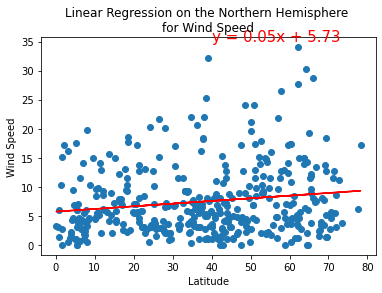

In [27]:
# Linear regression on the Northern Hemisphere WIND SPEED
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

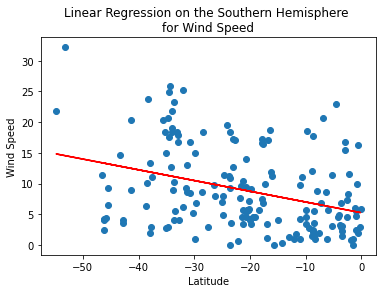

In [28]:
# Linear regression on the Southern Hemisphere WIND SPEED
x_values = southern_hemi_df["Lat"]
y_values =  southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))